In [22]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
churn = pd.read_csv('churn2020.txt',sep='\t', na_values = ['missing', 'na', 'N/A', 'NA', 'nan'])
#we explicitly define the missing values on import of the text file

In [24]:
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,IN,122,408,397-4976,no,no,0,170.5,94,28.99,...,109,14.76,248.6,75,11.19,11.3,2,3.05,1,False.
1,AZ,95,408,334-2577,no,no,0,238.1,65,40.48,...,98,15.91,NaN,115,8.55,11.8,4,3.19,4,False.
2,MI,36,510,400-3637,no,yes,29,281.4,102,47.84,...,76,17.19,187.2,113,8.42,9.0,6,2.43,2,False.
3,NM,93,510,383-4361,no,yes,21,117.9,131,20.04,...,115,13.98,217,86,9.76,9.8,3,2.65,1,False.
4,CO,141,415,371-4306,no,yes,32,148.6,91,25.26,...,97,11.14,219.4,142,9.87,10.1,1,2.73,1,False.


# Question 1
Explore whether there are missing values for any of the variables. Determine the number of observations in the sample.

In [25]:
#Identify number of NAs on the basis of isna() function
print("The following columns have missing values, as identified by the isna() function:")
for i in churn.columns:
    if churn[i].isna().sum() > 0: print(i + " " + str(churn[i].isna().sum()))

The following columns have missing values, as identified by the isna() function:
Eve Mins 22
Night Mins 10


In [26]:
#additional approach: identify issues by testing whether type of column changes as a result of reading 
#the file only the first line or the full file

# Dictionary of pairs of column names & object types
dataTypeDict = dict(churn.dtypes)
dataTypePandas_full = pd.DataFrame(list(dataTypeDict.items()),columns = ['column1','column2']) 

# Dictionary on the basis of only first line of datafile
churn_firstline = pd.read_csv('churn2020.txt',sep='\t', nrows=1)
dataTypeDict_firstline = dict(churn_firstline.dtypes)
dataTypePandas_firstline = pd.DataFrame(list(dataTypeDict_firstline.items()),columns = ['column1','column2']) 

print('In which columns the data type changes when reading more data:')
pd.concat([dataTypePandas_full,dataTypePandas_firstline]).drop_duplicates(keep=False)

#we observe some 'string' values in the column Night Mins. 

In which columns the data type changes when reading more data:


,column1,column2
13,Night Mins,object
13,Night Mins,float64


In [27]:
#Morevoer, when we look at the data there are also different forms of missing entries, different usage of na/nan/NaN or 
#empty fields (Eve Mins), 'missing'. A way to identify these values as missing is to address this in the na_values= parameter of read_csv.

In [28]:
#number of observations
print("The number of observation in the set are: ", churn.State.count())

The number of observation in the set are:  3229


# Question 2
Create a pivot table which shows the number of observations with 'State'-values vertical and 'Area Code'-values horizontal. See also: [pbpython.com/pandas-pivot-table-explained.html](http://pbpython.com/pandas-pivot-table-explained.html)

In [29]:
pd.pivot_table(churn,index=['State'], values=['Churn?'], columns=['Area Code'],aggfunc=[len])

len        
          Churn?        
Area Code    408 415 510
State                   
AK            12  23  14
AL            25  40  14
AR            13  26  14
AZ            14  33  13
CA             7  16  10
CO            22  28  12
CT            22  39  13
DC            14  26  12
DE            12  31  17
FL            12  30  20
GA            14  19  18
HI            15  29   7
IA             6  19  15
ID            10  38  20
IL            15  27  15
IN            15  32  20
KS            12  36  21
KY            14  31  12
LA            11  26  11
MA            24  27  11
MD            14  39  15
ME            15  24  22
MI            12  38  22
MN            19  38  22
MO            15  35  11
MS            14  31  19
MT            16  33  16
NC            24  28  15
ND            19  28  15
NE            13  33  14
NH            25  19  11
NJ            13  32  19
NM            16  35  10
NV            14  33  18
NY            18  46  17
OH            21  39  16
OK            15  26  17
OR            13  43  20
PA            14  19  12
RI            12  34  18
SC            13  29  17
SD            15  28  16
TN            11  30  12
TX            20  36  13
UT            11  36  23
VA            24  35  15
VT            17  35  18
WA            23  25  17
WI            22  34  20
WV            20  50  33
WY            16  38  19

# Question 3
Use a histogram to determine visually whether there are any outliers among the number of *calls to customer service*, i.e. column $\texttt{'CustServ Calls'}$.

In [30]:
churn['CustServ Calls'].describe()

count    3229.000000
mean        1.558377
std         1.313386
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: CustServ Calls, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

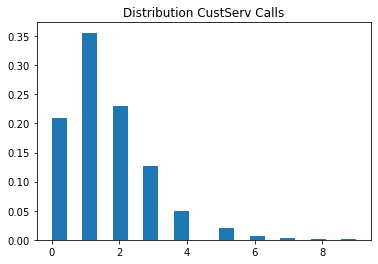

In [31]:
selection = churn['CustServ Calls']
plt.hist(selection, weights=np.ones(selection.size)/ selection.size,bins=20,)
plt.title("Distribution CustServ Calls")
plt.show
#the distribution is right skewed with outliers

# Question 4
Identify how many *customer service calls*, i.e. column $\texttt{'CustServ Calls'}$, should be considered outliers, using:
* a. The Z-score method (|Z-score|>3), and
* b. The IQR method.

In [32]:
#Z score
Outliers_Z = churn['CustServ Calls'].mean()+3*churn['CustServ Calls'].std(axis=0)
x = churn['CustServ Calls']>Outliers_Z #negative outliers are not applicable to this example (zero bound)
x.sum()

35

In [33]:
#IQR
Q1 = churn['CustServ Calls'].quantile(0.25)
Q3 = churn['CustServ Calls'].quantile(0.75)
IQR = Q3 - Q1
OutliersIQR = Q3 + 1.5*IQR
x = churn['CustServ Calls']>OutliersIQR #negative outliers are not applicable to this example (zero bound)
x.sum()

256

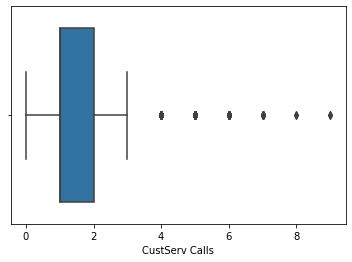

In [34]:
import seaborn as sns
sns.boxplot(churn['CustServ Calls'])

# Question 5
Estimate the skewness as follows:
* a. Calculate the skewness of *day minutes*, i.e. column $\texttt{'Day Mins'}$, based on $\text{Skewness}=3\frac{(\text{mean}-\text{median})}{\text{standard deviation}}$.
* b. Then calculate the skewness of the Z-score standardized *day minutes*. Comment.
* c. Based on the skewness value, would you consider *day minutes* to be skewed or nearly
perfectly symmetric?

In [35]:
#a. skewness of day minutes
y = churn['Day Mins']
SkewnessA = 3*((y.mean()-y.median())/y.std())
print(SkewnessA)

0.015148565832415199


In [36]:
#b. skewness of z-score standardized data
z = (y - y.mean())/y.std()
SkewnessZ = 3*((z.mean()-z.median())/z.std())
print(SkewnessZ)
#as per the slides for week 2, standarization should not change the skewness of the distribution

0.015148565832409675


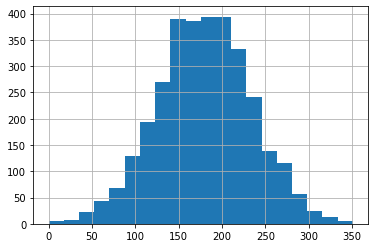

In [37]:
#c
y.hist(bins=20)
#given the low skewness score and from visually interpreting the below, 
#we conclude that the distribution is nearly perfectly symmetric.

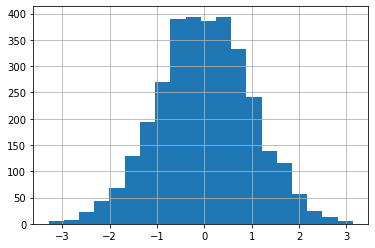

In [38]:
z.hist(bins=20)

# Question 6
Work with *international minutes*, i.e. column $\texttt{'Intl Mins'}$, as follows.
* a. Construct a Q-Q normal plot of *international minutes*. Hint: use sm.qqplot
* b. What is stopping this variable from being normally distributed?
* c. Construct a flag variable to deal with the situation in (b).
* d. Construct a normal probability plot of the derived variable *nonzero international minutes*. Comment on the normality.

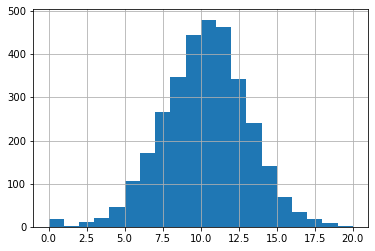

In [39]:
churn['Intl Mins'].hist(bins=20)
#the variable is zero bounded and that is causing the distribution not to be normally distributed

In [40]:
#c. to deal with situation in b.
dummy = 1-(1*churn['Intl Mins']==0)
churn_mins_nonzero = churn['Intl Mins'][churn['Intl Mins']!=0]

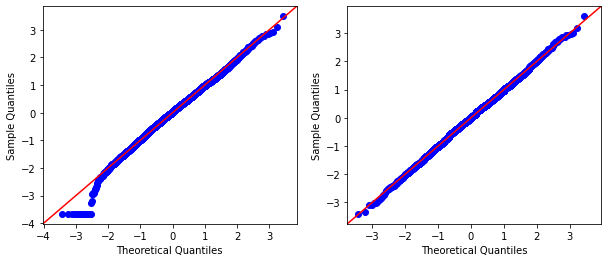

In [41]:
fig, axes=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sm.qqplot(churn['Intl Mins'], fit=True, line='45', ax=axes[0])
sm.qqplot(churn_mins_nonzero, fit=True, line='45', ax=axes[1])
plt.show()
#when filter on non-zero values only, the normality problems seems to be fixed 
#left: Q-Q plot based on orginal data; right: Q-Q plot after taking only non-zero data

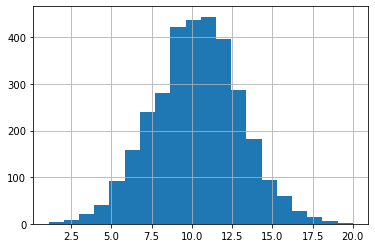

In [42]:
#d. histogram of the nonzero Intl Min
churn_mins_nonzero.hist(bins=20) #the distribution shows more normally distributed